In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import warnings
# please ignore the warnings
warnings.filterwarnings('ignore')

In [2]:
tickers = ['ABH',
 'RFP',
 'ALLY',
 'AAPL',
 'SYF',
 'MTBC',
 'BABA',
 'AGI',
 'BYI',
 'CI',
 'MWD',
 'MS',
 'MSS',
 'MLSS',
 'ONNN',
 'ON',
 'SIMO',
 'VNDA',
 'GOOG',
 'MSFT',
 'TSLA',
 'DIS',
 'META']

In [3]:
# ! pip install yfinance

In [4]:
from portfolio import build_portfolio

names = [item for item in tickers if item not in ['ABH', 'BYI', 'MWD', 'MSS', 'ONNN']]
start_date = '2018-01-01'
end_date = '2022-11-04'
pf = build_portfolio(names=names,
                    start_date=start_date,
                    end_date=end_date,
                    data_api='yfinance')

[*********************100%***********************]  18 of 18 completed


In [5]:
pf.data.head(3)

,RFP,ALLY,AAPL,SYF,MTBC,BABA,AGI,CI,MS,MLSS,ON,SIMO,VNDA,GOOG,MSFT,TSLA,DIS,META
Date,,,,,,,,,,,,,,,,,,
2018-01-02,9.086511,25.643799,40.888065,33.950119,2.6500,183.649994,6.375973,195.608154,45.083832,1.11,21.809999,48.341873,15.60,53.250000,80.738174,21.368668,108.726059,181.419998
2018-01-03,9.086511,25.521811,40.880943,34.177269,2.7100,184.000000,6.442986,198.891464,45.204762,1.19,22.780001,48.201832,15.60,54.124001,81.113899,21.150000,109.192848,184.669998
2018-01-04,9.006454,25.896486,41.070835,34.421894,2.7501,185.710007,6.471707,199.934387,45.895832,1.19,22.780001,48.166828,15.55,54.320000,81.827827,20.974667,109.144241,184.330002


In [6]:
pf.properties()

----------------------------------------------------------------------
Stocks: RFP, ALLY, AAPL, SYF, MTBC, BABA, AGI, CI, MS, MLSS, ON, SIMO, VNDA, GOOG, MSFT, TSLA, DIS, META
Time window/frequency: 252
Risk free rate: 0.04
Portfolio Expected Return: 0.194
Portfolio Volatility: 0.271
Portfolio Sharpe Ratio: 0.567

Skewness:
       RFP      ALLY      AAPL       SYF      MTBC      BABA       AGI  \
0  0.66034  0.568453  0.218509  0.283938  0.810421  0.027392 -0.019465   

         CI        MS      MLSS      ON      SIMO      VNDA      GOOG  \
0  0.768837  0.566508  1.071298  0.8885  0.771709  0.814206  0.630579   

       MSFT      TSLA       DIS      META  
0  0.220924  0.489043  0.635077  0.756065  

Kurtosis:
       RFP      ALLY      AAPL       SYF      MTBC      BABA       AGI  \
0 -0.04525 -0.790103 -1.540262 -0.135781 -0.509481 -0.251296 -0.803887   

         CI        MS      MLSS        ON      SIMO      VNDA      GOOG  \
0  0.067814 -1.264494  1.333861 -0.601514 -0.610216  0.

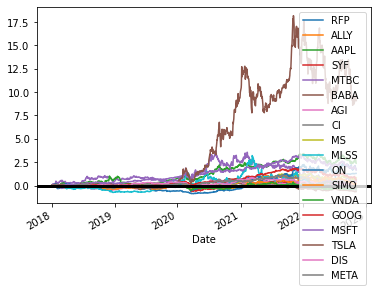

In [7]:
pf.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)

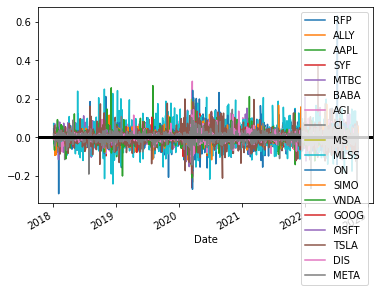

In [8]:
pf.comp_daily_returns().plot().axhline(y = 0, color = "black", lw = 3)

Text(0.5, 1.0, 'Correlation Matrix')

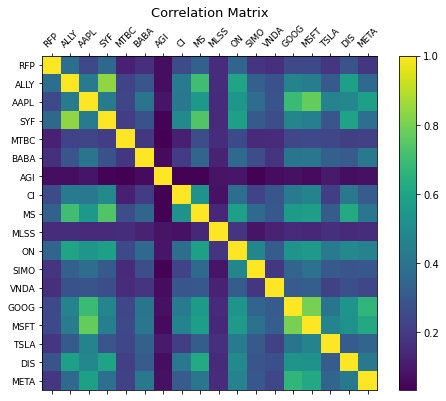

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

f = plt.figure(figsize=(8, 6))
df = pf.comp_daily_returns()
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=9, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=9)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=13)


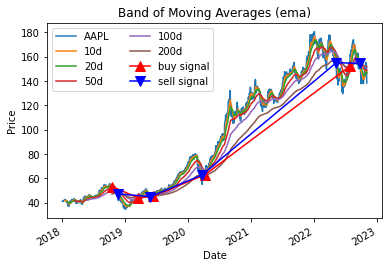

In [10]:
from moving_average import compute_ma, ema

aapl = pf.get_stock("AAPL").data.copy(deep=True)
spans = [10, 20, 50, 100, 200]
ma = compute_ma(aapl, ema, spans, plot=True)

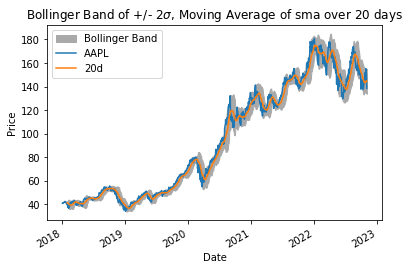

In [11]:
from moving_average import plot_bollinger_band, sma

aapl = pf.get_stock("AAPL").data.copy(deep=True)
span = 20
plot_bollinger_band(aapl, sma, span)

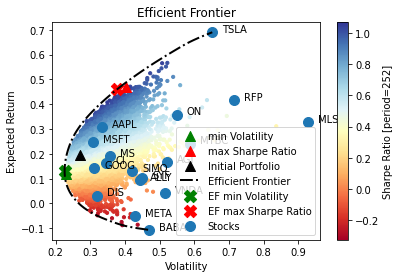

In [12]:
# performs and plots results of Monte Carlo run (200000 iterations)
opt_w, opt_res = pf.mc_optimisation(num_trials=100000)
# plots the results of the Monte Carlo optimisation
pf.mc_plot_results()
# plots the Efficient Frontier
pf.ef_plot_efrontier()
# plots optimal portfolios based on Efficient Frontier
pf.ef.plot_optimal_portfolios()
# plots individual plots of the portfolio
pf.plot_stocks()

In [13]:
opt_w

,RFP,ALLY,AAPL,SYF,MTBC,BABA,AGI,CI,MS,MLSS,ON,SIMO,VNDA,GOOG,MSFT,TSLA,DIS,META
Min Volatility,-0.00000,-0.0,-0.000000,-0.000000,0.060371,0.061247,0.161071,0.166332,0.075685,-0.0,-0.0,0.150416,-0.0,0.133264,-0.000000,-0.000000,0.191613,-0.0
Max Sharpe Ratio,0.08047,-0.0,0.305016,0.059436,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0,0.006407,-0.0,-0.000000,0.095162,0.453509,-0.000000,-0.0


In [14]:
opt_w = opt_w.transpose()

In [15]:
# !python.exe -m pip install --upgrade pip
# ! pip install plotly
# ! pip install --upgrade nbformat

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go  # Impoting our graphical and data extracting pakcages

df = opt_w
values = df['Min Volatility'].values.tolist()
names = df.index.tolist()

fig = go.Figure(data= [go.Pie(values = values, labels=names)])
fig.update_layout(
    title="Minimized Volatility Portfolio Weights",
)
fig.show()
print(values)

[-0.0, -0.0, -0.0, -0.0, 0.060370705177355655, 0.061247373764837874, 0.16107131106339923, 0.16633244001062533, 0.07568488028194999, -0.0, -0.0, 0.15041584523643586, -0.0, 0.13326431656274385, -0.0, -0.0, 0.19161312790265228, -0.0]


In [17]:
df = opt_w
values = df['Max Sharpe Ratio'].values.tolist()
names = df.index.tolist()

fig = go.Figure(data= [go.Pie(values = values, labels=names)])
fig.update_layout(
    title="Maximized Sharp Ratio Portfolio Weights",
)
fig.show()
print(values)

[0.08047038016363128, -0.0, 0.30501613466936167, 0.059435514178331865, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.006407088707476737, -0.0, -0.0, 0.09516167363171134, 0.4535092086494871, -0.0, -0.0]


In [18]:
# back testing
names = [item for item in tickers if item not in ['ABH', 'BYI', 'MWD', 'MSS', 'ONNN', 'MLSS']]
start_date = '2022-11-05'
end_date = '2023-02-28'
bt = build_portfolio(names=names,
                    start_date=start_date,
                    end_date=end_date,
                    data_api='yfinance')

[*********************100%***********************]  17 of 17 completed


In [19]:
from quants import weighted_mean

weights0 = np.ones(len(pf.stocks))/len(pf.stocks) 
weights = opt_w['Max Sharpe Ratio']
weights1 = opt_w['Min Volatility']
ret_df = bt.comp_cumulative_returns()
ret_df['max_sharp'] = ret_df.iloc[:,0:len(pf.stocks)].apply(lambda x: weighted_mean(x, weights), axis=1)
ret_df['min_vol'] = ret_df.iloc[:,0:len(pf.stocks)].apply(lambda x: weighted_mean(x, weights1), axis=1)
ret_df['eq_wei'] = ret_df.iloc[:,0:len(pf.stocks)].apply(lambda x: weighted_mean(x, weights0), axis=1)

In [20]:
spy =  build_portfolio(names=['SPY'],
                    start_date=start_date,
                    end_date=end_date,
                    data_api='yfinance')
ret_df['SPY'] = spy.comp_cumulative_returns()

[*********************100%***********************]  1 of 1 completed


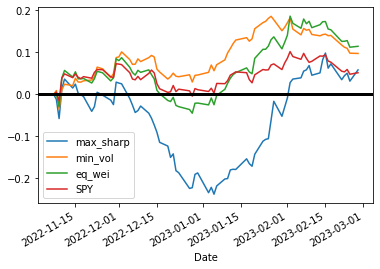

In [21]:
ret_df.loc[:,['max_sharp','min_vol','eq_wei','SPY']].plot().axhline(y = 0, color = "black", lw = 3)

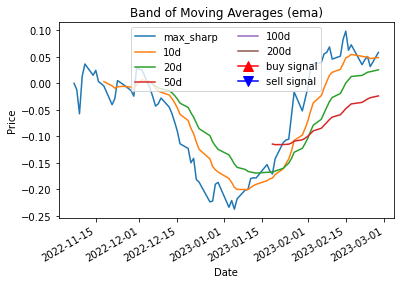

In [22]:
from moving_average import compute_ma, ema

stock_ticker = ret_df['max_sharp'].to_frame().copy(deep=True)
spans = [10, 20, 50, 100, 200]
ma = compute_ma(stock_ticker, ema, spans, plot=True)

In [23]:
ret_df

,RFP,ALLY,AAPL,SYF,MTBC,BABA,AGI,CI,MS,ON,...,VNDA,GOOG,MSFT,TSLA,DIS,META,max_sharp,min_vol,eq_wei,SPY
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-11-08,0.000000,-0.000775,0.004175,-0.003039,0.052117,-0.022665,0.058971,0.010389,-0.003389,0.024744,...,-0.018832,0.002933,0.004388,-0.029328,-0.005277,-0.002585,-0.011918,0.009108,0.002220,0.005395
2022-11-09,-0.001429,-0.037955,-0.029153,-0.032873,-0.009772,-0.069861,0.040151,0.001911,-0.024775,-0.025050,...,-0.018832,-0.014100,-0.014745,-0.098894,-0.136214,0.049111,-0.057544,-0.035702,-0.029536,-0.015318
2022-11-10,0.000952,0.110767,0.057227,0.069890,0.022801,0.000861,0.114178,-0.003175,0.037747,0.111807,...,0.018832,0.062267,0.066310,-0.032271,-0.099273,0.156638,0.013334,0.010795,0.039150,0.038795
2022-11-11,0.005238,0.142525,0.077599,0.111326,0.048860,0.015206,0.114178,-0.063354,0.060886,0.146327,...,0.007533,0.091145,0.084434,-0.005632,-0.053968,0.168528,0.036448,0.024248,0.057102,0.048849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-21,0.030952,0.165206,0.070449,-0.027229,0.332248,0.364223,0.280482,-0.090576,0.150022,0.210936,...,-0.367232,0.038353,0.114744,0.001471,0.016529,0.779156,0.035029,0.117520,0.126316,0.055198
2023-02-22,0.035238,0.175372,0.073549,-0.014721,0.346906,0.359633,0.262872,-0.087668,0.145899,0.199939,...,-0.365348,0.035533,0.109626,0.019180,0.012446,0.769231,0.044524,0.112360,0.126569,0.053744
2023-02-23,0.035238,0.192186,0.077081,-0.001659,0.325733,0.350739,0.261614,-0.088504,0.153792,0.197342,...,-0.370998,0.027298,0.124009,0.025320,0.012944,0.778743,0.050531,0.109791,0.128191,0.059349


In [24]:
# query data from crsp -
import wrds
from build_query import build_query
from abr_regression import abrReg 

db = wrds.Connection(wrds_username='lshawusf')
start_date = '2022-11-05'
end_date = '2022-12-31'
abr = abrReg(db, start_date, end_date)

Loading library list...
Done


In [25]:
df_input = ret_df.reset_index()[['Date','eq_wei','max_sharp','min_vol']].rename(columns={'Date':'date'})

In [26]:
ff3_df = abr.ff3f(df_input, ['eq_wei','max_sharp','min_vol'])

select date,mktrf,smb,hml,rf from ff.fivefactors_daily where date between '2022-11-05' and '2022-12-31'


In [30]:
# get the rows where rf is NaN
ff3_df = ff3_df[ff3_df['rf'].notna()]

In [31]:
ff3_df

,date,eq_wei,max_sharp,min_vol,mktrf,smb,hml,rf,eq_wei_rf,max_sharp_rf,min_vol_rf
0,2022-11-07,0.000000,0.000000,0.000000,0.0087,-0.0034,0.0061,0.00014,-0.000140,-0.000140,-0.000140
1,2022-11-08,0.002220,-0.011918,0.009108,0.0050,-0.0055,-0.0038,0.00014,0.002080,-0.012058,0.008968
2,2022-11-09,-0.029536,-0.057544,-0.035702,-0.0225,-0.0050,0.0055,0.00014,-0.029676,-0.057684,-0.035842
3,2022-11-10,0.039150,0.013334,0.010795,0.0568,0.0105,-0.0311,0.00014,0.039010,0.013194,0.010655
4,2022-11-11,0.057102,0.036448,0.024248,0.0107,0.0016,-0.0108,0.00014,0.056962,0.036308,0.024108
5,2022-11-14,0.041225,0.015242,0.020896,-0.0095,-0.0026,0.0026,0.00014,0.041085,0.015102,0.020756
6,2022-11-15,0.053802,0.024421,0.038550,0.0103,0.0047,-0.0070,0.00014,0.053662,0.024281,0.038410
7,2022-11-16,0.037104,0.003089,0.029483,-0.0103,-0.0106,0.0057,0.00014,0.036964,0.002949,0.029343
8,2022-11-17,0.037059,-0.000621,0.029250,-0.0042,-0.0029,0.0059,0.00014,0.036919,-0.000761,0.029110
9,2022-11-18,0.037947,-0.005329,0.032369,0.0040,-0.0009,0.0007,0.00014,0.037807,-0.005469,0.032229


In [48]:
import statsmodels.api as sm

ff3_alpha = {}
ff3_tv = {}
for col in ['eq_wei','max_sharp','min_vol']:
    ff3_model = sm.OLS(ff3_df[col], 
                    sm.add_constant(ff3_df[['mktrf', 'smb', 'hml']])).fit()
    ff3_alpha[col] = ff3_model.params[0]
    ff3_tv[col] = ff3_model.tvalues[0]
ff3_table = pd.DataFrame({'alpha':ff3_alpha, 't-value':ff3_tv}, index=['eq_wei','max_sharp','min_vol'])

In [49]:
ff3_table

,alpha,t-value
eq_wei,0.024488,4.334986
max_sharp,-0.060589,-4.950487
min_vol,0.049988,10.309512
